In [1]:
import pandas as pd
from EMM import EMM
import numpy as np
import seaborn
import matplotlib.pyplot as plt

# Load data and run Beam search

In [2]:
df = pd.read_csv('example/data/german-credit-scoring.csv', sep=";")
target_columns = ['Duration in months', 'Credit amount']
clf = EMM(width=9, depth=3, evaluation_metric='regression', n_jobs=-1, log_level=2)
clf.search(df, target_cols=target_columns)
# clf.visualise(cols=3, subgroups=8, include_dataset=True)

2024-10-17 10:12:44,892 - INFO - Start
2024-10-17 10:12:44,902 - INFO - Memory usage before downsizing 164.19 MB
2024-10-17 10:12:44,918 - INFO - Memory usage after downsizing 21.61 MB
2024-10-17 10:13:04,072 - DEBUG - --------------------
2024-10-17 10:13:04,080 - DEBUG - Installment rate in percentage of <br> disposable income = 4 AND Telephone = none 33.27162506486 (286)
2024-10-17 10:13:04,080 - DEBUG - Installment rate in percentage of <br> disposable income = 1 AND Other debtors / <br> guarantors = none AND Other installment plans = <br> none 26.867504740339992 (104)
2024-10-17 10:13:04,080 - DEBUG - Installment rate in percentage of <br> disposable income = 4 AND Job = skilled employee <br> / official 30.65000007436193 (307)
2024-10-17 10:13:04,080 - DEBUG - Installment rate in percentage of <br> disposable income = 1 AND Foreign worker = Yes 20.656402110068417 (124)
2024-10-17 10:13:04,080 - DEBUG - Installment rate in percentage of <br> disposable income = 4 AND Present reside

# Plot Jaccard matrix On existing subsets

2024-10-17 10:13:04,184 - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2024-10-17 10:13:04,192 - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2024-10-17 10:13:04,192 - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2024-10-17 10:13:04,192 - DEBUG - findfont: score(FontEntry(fname='c:\\Users\\barts\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXNonUniBolIta.ttf', name='STIXNonUnicode', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
2024-10-17 10:13:04,192 - DEBUG - findfont: score(FontEntry(fname='c:\\Users\\barts\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSansMono.ttf', name='DejaVu Sans Mono', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2024-10-17

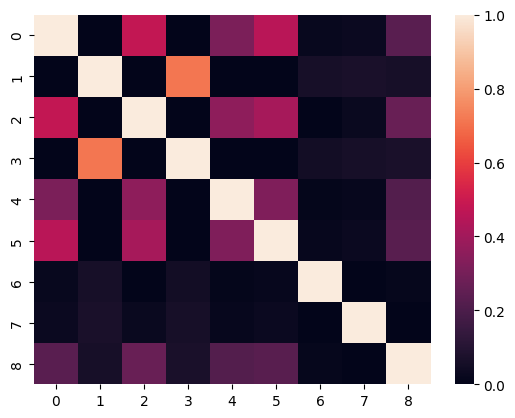

In [3]:
from Jaccard import jaccard, jaccardmatrix

matrix = jaccardmatrix(clf.beam.subgroups)
seaborn.heatmap(matrix)
plt.show()

# Alter existing beam search to Jaccard beam search


In [4]:
from Jaccard import Jaccard_Beam, Jaccard_EMM, create_subgroups, Subgroup, jaccardmaxlist, jaccardmax

: 

In [5]:
df = pd.read_csv('example/data/german-credit-scoring.csv', sep=";")
target_columns = ['Duration in months', 'Credit amount']
jaccardbEaMM = Jaccard_EMM(width=9, depth=2, evaluation_metric='regression', n_jobs=-1, log_level=2)
jaccardbEaMM.search(df, target_cols=target_columns)
# jaccardbEaMM.visualise(cols=3, subgroups=8, include_dataset=True)

2024-10-17 10:13:04,689 - INFO - Memory usage before downsizing 164.19 MB


2024-10-17 10:13:04,703 - INFO - Memory usage after downsizing 21.61 MB


In [ ]:
matrix = jaccardmatrix(jaccardbEaMM.beam.subgroups)
seaborn.heatmap(matrix)
plt.savefig('heatmap.png')

In [ ]:
df = pd.read_csv('example/data/german-credit-scoring.csv', sep=";")
target_columns = ['Duration in months', 'Credit amount']
jaccardbEaMM = Jaccard_EMM(width=9, depth=2, evaluation_metric='regression', n_jobs=-1, log_level=2)
jaccardbEaMM.search(df, target_cols=target_columns)
# jaccardbEaMM.visualise(cols=3, subgroups=8, include_dataset=True)

In [ ]:
from numpy import mean
from pattern_team import pattern_team_DTA, pattern_team_weighted_DTA, mean_error, maskforsubgroup


In [12]:
import statsmodels.api as SM
from sklearn.metrics import mean_squared_error as MSE

pog = pattern_team_DTA(clf.beam.subgroups, df, df, target_columns, SM.OLS)
print(MSE(df[target_columns[-1]],pog))

3675163.5561845666


In [12]:
for i in clf.beam.subgroups[0].data.index:
    print(i)

9
13
15
16
26
33
35
37
39
40
44
45
46
49
50
67
69
75
76
86
89
90
91
92
93
96
97
98
100
101
124
125
126
127
133
137
145
149
152
157
161
164
166
167
170
177
179
182
185
188
191
194
197
201
203
204
207
220
222
225
228
229
230
233
235
237
238
240
244
246
252
256
257
259
261
265
266
269
273
281
282
283
286
289
293
294
302
305
309
311
315
318
320
321
323
324
328
329
331
332
337
338
339
345
346
349
355
358
359
360
364
368
370
379
382
383
399
401
403
404
414
416
419
421
423
426
427
438
439
443
445
458
463
471
472
474
476
477
481
493
497
498
500
503
504
505
508
510
513
514
519
524
526
528
532
534
538
542
544
545
548
550
553
561
573
574
578
579
582
583
587
592
596
601
602
604
607
608
609
610
612
614
619
622
623
624
625
631
632
636
638
640
641
648
649
651
652
656
661
662
669
674
678
682
687
698
700
703
707
708
711
713
721
722
723
727
728
732
739
741
753
754
755
759
761
762
773
775
777
783
788
799
800
803
807
814
819
823
835
836
839
840
842
847
849
853
860
866
869
873
875
877
882
883
885
910
920
9

In [11]:
data = clf.beam.subgroups[0].data
data[2>data["Credit history"]]

,Status of existing checking account,Duration in months,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,Foreign worker,Score
9,1,30,0,3,5234,1,3,4,3,0,...,3,28,0,0,2,2,1,1,0,1
13,0,24,0,3,1199,1,0,4,0,0,...,3,60,0,0,2,1,1,1,0,1
15,0,24,1,0,1282,4,1,4,1,0,...,3,32,0,0,1,1,1,1,0,1
16,2,24,0,0,2424,0,0,4,0,0,...,1,53,0,0,2,0,1,1,0,0
33,2,12,0,5,1264,0,0,4,0,0,...,2,57,0,2,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,1,15,1,7,1514,4,1,4,0,1,...,0,22,0,0,1,0,1,1,0,0
973,0,60,1,5,7297,1,0,4,0,2,...,2,36,0,2,1,0,1,1,0,1
985,0,15,0,2,1433,1,1,4,1,0,...,1,25,0,2,2,0,1,1,0,0
989,1,24,0,0,1743,1,0,4,0,0,...,1,48,0,0,2,1,1,1,0,0
